# A notebook for cross-checking st

In [1]:
import binascii
import bitstring
import time
import datetime
import serial
import csv
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd # Note that this is not commai Panda, but Database Pandas
import cantools 
import matplotlib.animation as animation
from matplotlib import style
import uuid

In [2]:
import strym.DBC_Read_Tools as DBC
from datetime import datetime

def dateparse(ts):
    # if you encounter a "year is out of range" error the timestamp
    # may be in milliseconds, try `ts /= 1000` in that case
    ts = float(ts)
    d = datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S:%f')
    return d

In [3]:
datetime.fromtimestamp(1583178900.1435766)

datetime.datetime(2020, 3, 2, 12, 55, 0, 143577)

In [4]:
fileName = '/home/ivory/CyverseData/JmscslgroupData/PandaData/2020_03_02/2020-03-02-12-54-30-482889__CAN_Messages.csv'
#can_data = pd.read_csv(fileName, parse_dates=[0], date_parser=dateparse)# read in the data
can_data = pd.read_csv(fileName)# read in the data

dbcfile = '/home/ivory/VersionControl/Jmscslgroup/strym/examples/newToyotacode.dbc'
db_file = cantools.db.load_file(dbcfile)# Specify your dbc file

In [5]:
can_data

,Time,Buffer,Bus,MessageID,Message,MessageLength
0,1.583179e+09,000040520800d4e7000000000200009e,0,658,000000000200009e,8
1,1.583179e+09,000000301800acc55d084400e0000113,1,384,5d084400e0000113,8
2,1.583179e+09,00002030180027c65d1592fc620001ed,1,385,5d1592fc620001ed,8
3,1.583179e+09,000040301800a2c75d075ef9a00001e7,1,386,5d075ef9a00001e7,8
4,1.583179e+09,0000603018001ec85dfff800000000e0,1,387,5dfff800000000e0,8
...,...,...,...,...,...,...
42862,1.583179e+09,0000807f08005c3c00002b802b807f18,0,1020,00002b802b807f18,8
42863,1.583179e+09,0000003218007713a900640000845882,1,400,a900640000845882,8
42864,1.583179e+09,000020321800ef13a900370000845856,1,401,a900370000845856,8
42865,1.583179e+09,0000403218006b15a906000000845826,1,402,a906000000845826,8


In [6]:
can_data['ClockTime'] = can_data['Time'].apply(dateparse)
can_data

,Time,Buffer,Bus,MessageID,Message,MessageLength,ClockTime
0,1.583179e+09,000040520800d4e7000000000200009e,0,658,000000000200009e,8,2020-03-02 12:54:30:757006
1,1.583179e+09,000000301800acc55d084400e0000113,1,384,5d084400e0000113,8,2020-03-02 12:54:30:759268
2,1.583179e+09,00002030180027c65d1592fc620001ed,1,385,5d1592fc620001ed,8,2020-03-02 12:54:30:759619
3,1.583179e+09,000040301800a2c75d075ef9a00001e7,1,386,5d075ef9a00001e7,8,2020-03-02 12:54:30:760273
4,1.583179e+09,0000603018001ec85dfff800000000e0,1,387,5dfff800000000e0,8,2020-03-02 12:54:30:760664
...,...,...,...,...,...,...,...
42862,1.583179e+09,0000807f08005c3c00002b802b807f18,0,1020,00002b802b807f18,8,2020-03-02 12:55:00:167643
42863,1.583179e+09,0000003218007713a900640000845882,1,400,a900640000845882,8,2020-03-02 12:55:00:167911
42864,1.583179e+09,000020321800ef13a900370000845856,1,401,a900370000845856,8,2020-03-02 12:55:00:168159
42865,1.583179e+09,0000403218006b15a906000000845826,1,402,a906000000845826,8,2020-03-02 12:55:00:169032


In [7]:
decimalData_STEER_ANGLE = DBC.convertData('STEER_ANGLE_SENSOR',0, can_data, db_file)
decimalData_STEER_FRACTION = DBC.convertData('STEER_ANGLE_SENSOR',1, can_data, db_file)
decimalData_STEER_RATE = DBC.convertData('STEER_ANGLE_SENSOR',2, can_data, db_file)

In [8]:
Steering_Rate_Time = decimalData_STEER_RATE['Time'].values
Steering_Rate_Message = decimalData_STEER_RATE['Message'].values

In [9]:
Steering_Angle_Time = decimalData_STEER_ANGLE['Time'].values
Steering_Angle_Message = decimalData_STEER_ANGLE['Message'].values

In [10]:
from scipy import integrate

In [11]:
Steering_Rate_int = integrate.cumtrapz(Steering_Rate_Message, Steering_Rate_Time, initial=Steering_Angle_Message[0])

In [12]:
import matplotlib.pyplot as plt

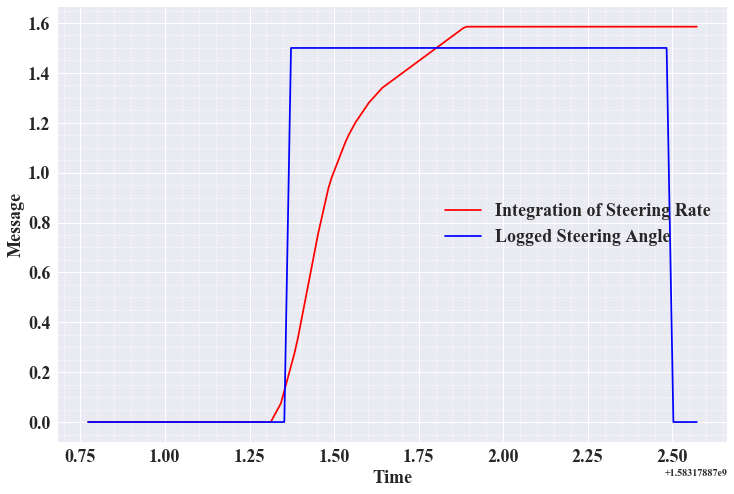

In [13]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,8)
params = {'legend.fontsize': 18,
  'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rcParams["font.family"] = "Times New Roman"
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(which='minor', linestyle=':')
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Message', fontsize=18)

plt.plot(Steering_Rate_Time[0:100], Steering_Rate_int[0:100], 'r-', Steering_Angle_Time[0:100], Steering_Angle_Message[0:100], 'b-' )
ax.legend(['Integration of Steering Rate', 'Logged Steering Angle' ])

In [14]:
Steering_Rate_int[100:200]

array([  1.58526981,   1.58526981,   1.58526981,   1.58526981,
         1.58526981,   1.58526981,   1.58526981,   1.58526981,
         1.58526981,   1.58526981,   1.58526981,   1.58526981,
         1.58526981,   1.56516278,   1.54539597,   1.50520575,
         1.44509804,   1.42509139,   1.38446772,   1.36516392,
         1.32456076,   1.30475533,   1.28455031,   1.24465239,
         1.20459807,   1.18473446,   1.14454091,   1.12409842,
         1.09439278,   1.07453132,   1.0446732 ,   1.03440547,
         0.98449707,   0.97439361,   0.96447587,   0.95472646,
         0.93427491,   0.92489195,   0.91475272,   0.87490606,
         0.86430645,   0.85475516,   0.8447994 ,   0.8447994 ,
         0.8447994 ,   0.8447994 ,   0.8447994 ,   0.8447994 ,
         0.8447994 ,   0.8447994 ,   0.8447994 ,   0.8447994 ,
         0.8447994 ,   0.8447994 ,   0.8447994 ,   0.8447994 ,
         0.8447994 ,   0.8447994 ,   0.8447994 ,   0.8447994 ,
         1.19055164,   1.88677919,   3.50165498,   4.50

In [15]:
Steering_Angle_Message[100:200]

array([  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1.5,   1.5,   3. ,
         4.5,   6. ,   7.5,  12. ,  13.5,  15. ,  22.5,  24. ,  27. ,
        31.5,  33. ,  43.5,  48. ,  51. ,  52.5,  60. ,  63. ,  66. ,
        69. ,  72. ,  78. ,  79.5,  87. ,  94.5,  96. ,  99. , 100.5,
       114. , 115.5, 118.5, 121.5, 123. , 126. , 129. , 130.5, 136.5,
       139.5])

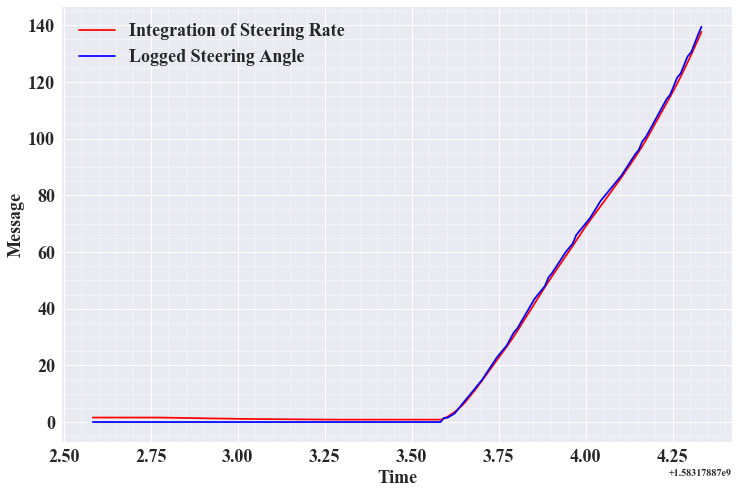

In [16]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,8)
params = {'legend.fontsize': 18,
  'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rcParams["font.family"] = "Times New Roman"
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(which='minor', linestyle=':')
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Message', fontsize=18)

plt.plot(Steering_Rate_Time[100:200], Steering_Rate_int[100:200], 'r-', Steering_Angle_Time[100:200], Steering_Angle_Message[100:200], 'b-' )
ax.legend(['Integration of Steering Rate', 'Logged Steering Angle' ])

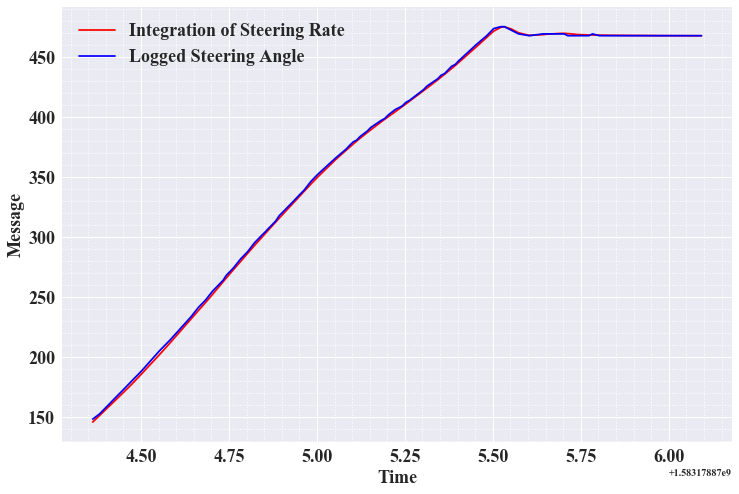

In [17]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,8)
params = {'legend.fontsize': 18,
  'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rcParams["font.family"] = "Times New Roman"
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(which='minor', linestyle=':')
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Message', fontsize=18)

plt.plot(Steering_Rate_Time[200:300], Steering_Rate_int[200:300], 'r-', Steering_Angle_Time[200:300], Steering_Angle_Message[200:300], 'b-' )
ax.legend(['Integration of Steering Rate', 'Logged Steering Angle' ])

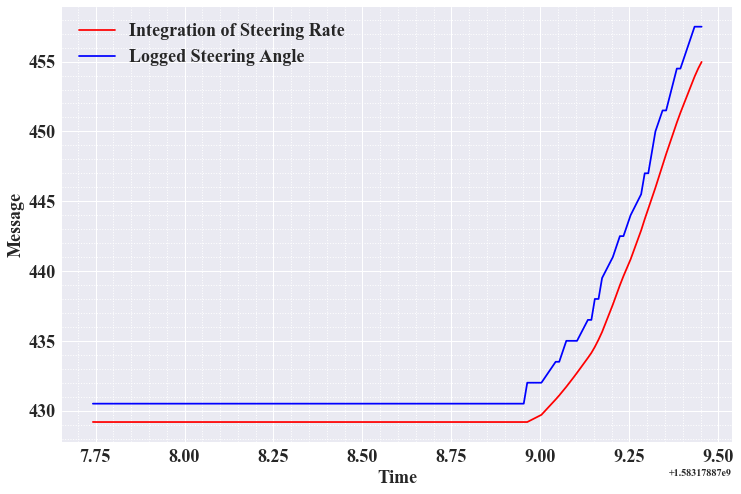

In [18]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,8)
params = {'legend.fontsize': 18,
  'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rcParams["font.family"] = "Times New Roman"
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis="y", labelsize=18)
ax.grid(which='minor', linestyle=':')
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Message', fontsize=18)

plt.plot(Steering_Rate_Time[400:500], Steering_Rate_int[400:500], 'r-', Steering_Angle_Time[400:500], Steering_Angle_Message[400:500], 'b-' )
ax.legend(['Integration of Steering Rate', 'Logged Steering Angle' ])

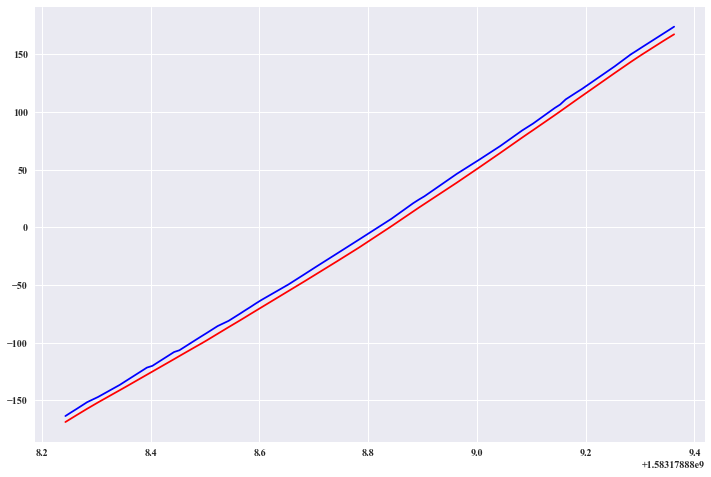

In [19]:
plt.plot(Steering_Rate_Time[950:1000], Steering_Rate_int[950:1000], 'r-', Steering_Angle_Time[950:1000], Steering_Angle_Message[950:1000], 'b-' )


## Experimental

(1501, 2)

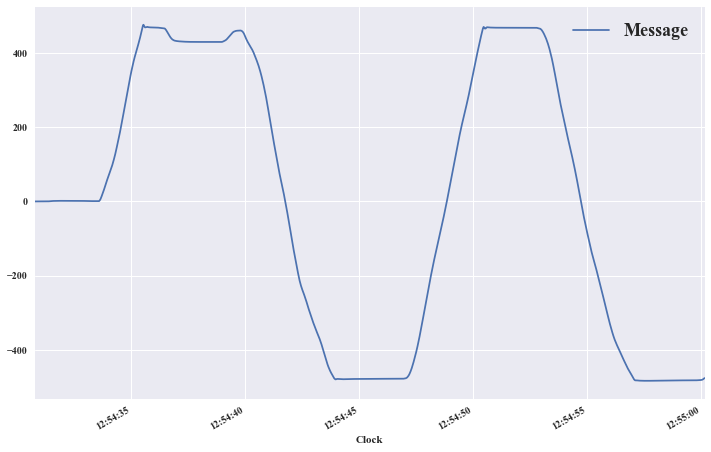

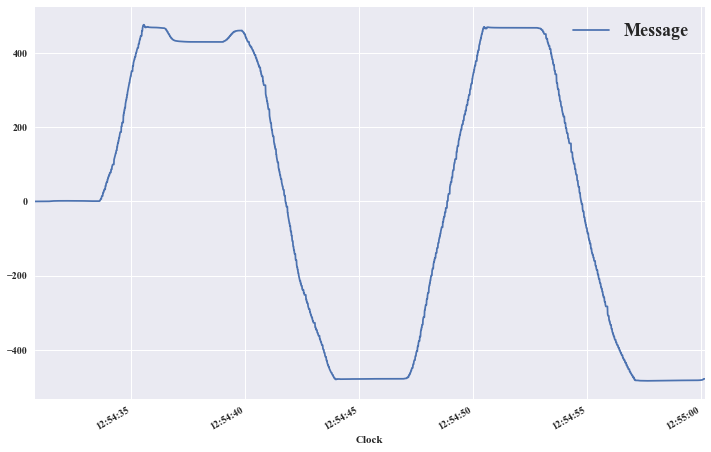

In [21]:
newdf = pd.DataFrame()
newdf['Time'] = decimalData_STEER_RATE['Time']
newdf['Message'] = Steering_Rate_int
newdf['ClockTime'] = newdf['Time'].apply(dateparse)
newdf
#days = pd.to_datetime(newdf['ClockTime'], unit='ns')
Time = pd.to_datetime(newdf['Time'], unit='s')

type(Time.dt.tz_localize('UTC'))
newdf['Clock'] = pd.DatetimeIndex(Time).tz_localize('UTC').tz_convert('US/Mountain')
newdf
newdf = newdf.set_index('Clock')
newdf
new2D = newdf.resample('10ms').ffill()
newdf  = newdf.drop(['Time'], axis = 1)
newdf.plot()
data_rate = 51.65
sampler = (1.0/data_rate)*1000.0
sampler = str(int(sampler)) + "ms"
new2D  = new2D.drop(['Time'], axis = 1)
new2D.plot()
newdf.shape